<a href="https://colab.research.google.com/github/edsml-lc2216/test/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREMIERE workshop
MNIST with PCA: example
Wednesday 3rd March 2021

In [1]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
import numpy as np

     |████████████████████████████████| 1.0 MB 3.5 MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-py3-none-any.whl size=1100374 sha256=998e2cff54782a0609c826a7026372a31ce1657434b344800eabe8af984c1d53
  Stored in directory: /root/.cache/pip/wheels/ce/4e/36/2ef48d7342cd326d5f3bdb4ddd0441f06b387b5cbfc8336095
Successfully built eofs


In [2]:
#Load data
(Xtrain, ytrain), (Xtest, ytest) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

11501568/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


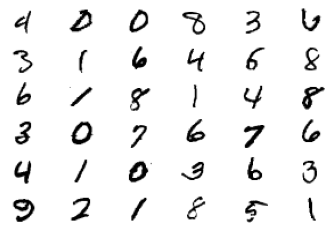

In [3]:
np.random.seed(42)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.randint(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')


In [7]:
#Reshape data - compine 2d array (28*28) for each number into 1 d array(784)
modelData = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1]*Xtrain.shape[2]))
modelData.shape

(60000, 784)

In [8]:
#Standardise data - scale it 
meanData = np.mean(modelData, axis = 0)
stdData = np.std(modelData)
modelDataScaled = (modelData - meanData)/stdData


In [10]:
#PCA analysis - building the diagonal matrix

solver = Eof(modelDataScaled)

varianceCumulative = np.cumsum(solver.varianceFraction())
eigenvalues = solver.eigenvalues()
pcs = solver.pcs()
eof = solver.eofs()
varianceCumulative


array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

Number of PCs for 99.0% variance is: 330


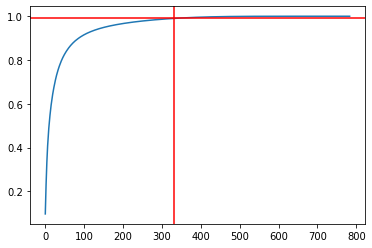

In [22]:
#set desired explained variance
targetVariance = 0.99 # want the Pcs that keep 99% of the variance , we need 330 of the data points 
#PCs that are not included will not give any information about the data (account for < 99% of the variance )



minPCs = np.min(np.where(varianceCumulative>targetVariance))
plt.plot(varianceCumulative)
plt.axvline(minPCs, color='r')
plt.axhline(targetVariance, color='r')
print('Number of PCs for ' + str(targetVariance*100) + '% variance is: ' + str(minPCs))




In [23]:
pcsTruncated = pcs[:, :minPCs]# trunate 
eofsTruncated= eof[:minPCs, :]
reconTruncatedPCs = np.matmul(pcsTruncated, eofsTruncated)*stdData + meanData

In [24]:
##Reshape to full-space
reconModelData = np.reshape(reconTruncatedPCs, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))
reconModelData.shape # put back too 28*28

(60000, 28, 28)

[56422 15795   860 38158 54343 44732 11284 54886  6265 16850]


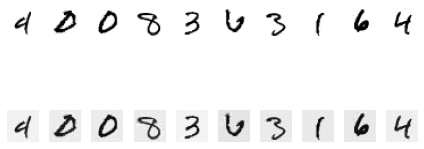

In [25]:
#Reconstruction comparison
np.random.seed(42)
nDisplay = 10
randomIndex = np.random.randint(0, Xtrain.shape[0], nDisplay)
print(randomIndex)
for i in range(nDisplay):
  plt.subplot(2, nDisplay, i + 1)
  plt.imshow(Xtrain[randomIndex[i], :, :], cmap = 'gray_r')
  plt.axis('off')
  plt.subplot(2, nDisplay, i + 1 + nDisplay)
  plt.imshow(reconModelData[randomIndex[i], :, :], cmap = 'gray_r')
  plt.axis('off')
plt.tight_layout()

In [26]:
# reduce the threshold variance we want to keep, images become blurrier 

In [26]:
# 99 variance is clear, and we need less than half the amount of data points 
# we have compressed the data 